In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

C:\Users\sebas\AppData\Local\Temp\ipykernel_12156\1521273946.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('cleaned_data.csv').drop('geometry', axis=1)
df.drop(['category_name', 'lat', 'lon'], axis=1, inplace=True)
df

,trending_date,channel_title,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,state,Country
0,2017-11-13 18:30:00+00:00,Lokdhun Punjabi,1096327,33966,798,882,False,False,Arunachal Pradesh,IN
1,2017-11-13 18:30:00+00:00,HJ NEWS,590101,735,904,0,True,False,Arunachal Pradesh,IN
2,2017-11-13 18:30:00+00:00,TFPC,473988,2011,243,149,False,False,Dadra And Nagar Haveli,IN
3,2017-11-13 18:30:00+00:00,Eruma Saani,1242680,70353,1624,2684,False,False,Nagaland,IN
4,2017-11-13 18:30:00+00:00,Filmylooks,464015,492,293,66,False,False,Himachal Pradesh,IN
...,...,...,...,...,...,...,...,...,...,...
158695,2018-06-13 21:00:00+00:00,Портье Дрогба,70654,3806,87,230,False,False,Khakass,RU
158696,2018-06-13 21:00:00+00:00,Pastime Time,129488,5893,164,990,False,False,Volgograd,RU
158697,2018-06-13 21:00:00+00:00,CaGArt,99163,4659,337,692,False,False,Komi,RU
158698,2018-06-13 21:00:00+00:00,DaisyxBTS 07,449611,24808,93,974,False,False,Khakass,RU


In [3]:
channel_df = df[['channel_title']].copy()
channel_df['count'] = 1
channel_df = channel_df.groupby('channel_title').count().sort_values('count', ascending=False)
channel_df

,count
channel_title,
etvteluguindia,282
VikatanTV,278
Flowers Comedy,268
ETV Plus India,253
RadaanMedia,241
...,...
Reflejo Público,1
Reggaeton Brasileiro,1
ReggaetonColombiano,1


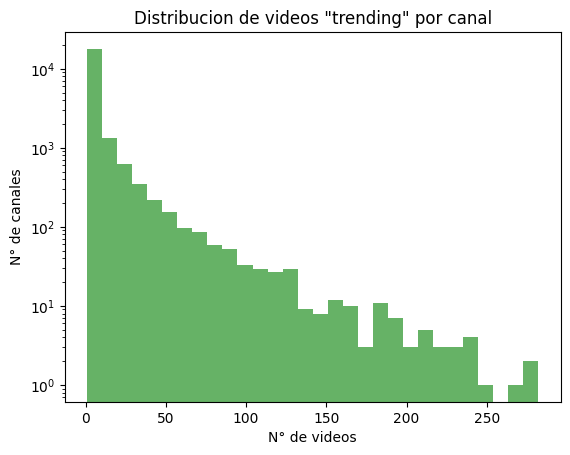

In [4]:
plt.hist(channel_df['count'], bins=30, density=False, alpha=0.6, color='g')
plt.yscale('log')
plt.title('Distribucion de videos "trending" por canal')
plt.xlabel('N° de videos')
plt.ylabel('N° de canales')
plt.show()

Distribucion exponencial

In [5]:
import matplotlib.font_manager

fonts = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

# print the names of all fonts
print([matplotlib.font_manager.get_font(f).family_name for f in fonts])

['Lucida Sans Typewriter', 'Bodoni MT', 'Consolas', 'Lucida Sans', 'Lucida Fax', 'Constantia', 'Segoe UI', 'Rockwell Extra Bold', 'Yu Gothic', 'Segoe UI', 'Georgia', 'Calibri', 'Segoe UI', 'Verdana', 'Brush Script MT', 'Book Antiqua', 'Segoe Script', 'Century Schoolbook', 'Segoe UI', 'Comic Sans MS', 'Lucida Sans', 'Arial', 'Gill Sans MT Ext Condensed Bold', 'Times New Roman', 'Gill Sans MT', 'Bell MT', 'Yu Gothic', 'Mongolian Baiti', 'HoloLens MDL2 Assets', 'Californian FB', 'Lucida Sans Typewriter', 'Perpetua', 'Segoe UI', 'Cambria', 'Eras Bold ITC', 'Century Gothic', 'Goudy Old Style', 'Constantia', 'Leelawadee', 'MS Reference Specialty', 'Magneto', 'Tw Cen MT', 'Wingdings', 'Niagara Engraved', 'Corbel', 'Sitka Small', 'Parchment', 'Britannic Bold', 'Kunstler Script', 'Imprint MT Shadow', 'Californian FB', 'Bodoni MT', 'Symbol', 'Agency FB', 'Gadugi', 'Franklin Gothic Demi Cond', 'MS Reference Sans Serif', 'Constantia', 'Cambria', 'Book Antiqua', 'Stencil', 'SimSun-ExtB', 'Bodoni MT

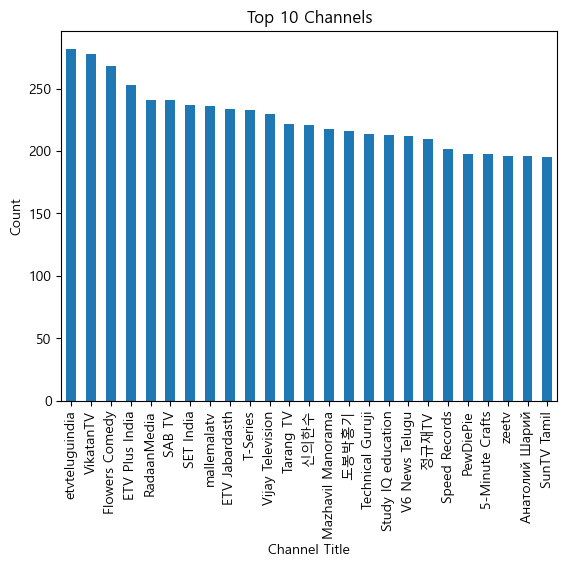

In [6]:
top_10_channels = channel_df.nlargest(25, 'count')

plt.rcParams['font.sans-serif'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False 
top_10_channels['count'].plot.bar()
plt.title('Top 10 Channels')
plt.xlabel('Channel Title')
plt.ylabel('Count')
plt.show()

In [7]:
channels_one_video = pd.Series(channel_df[channel_df['count'] == 1].index)
channels_one_video

0          Ната Владимировна
1                  坂Tube 2nd
2            Виталий Королев
3                     土呂山とろ美
4                      СБ ТВ
                ...         
7955         Reflejo Público
7956    Reggaeton Brasileiro
7957     ReggaetonColombiano
7958           ReggaetonFlow
7959                 ＷＡＪＯＩＫＡ
Name: channel_title, Length: 7960, dtype: object